## Test Notebook

In [215]:
# All imports
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
# get raw Dataset
data = pd.read_csv('data/raw_dataset/heart.csv')

display(data.head())



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\I573015\AppData\Local\Temp\ipykernel_12036\1921489372.py:26: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=var, ax=axs[row, col], palette=[color], hue=var, legend=False)
C:\Users\I573015\AppData\Local\Temp\ipykernel_12036\1921489372.py:26: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=var, ax=axs[row, col], palette=[color], hue=var, legend=False)
C:\Users\I573015\AppData\Local\Temp\ipykernel_12036\1921489372.py:26: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=var, ax=axs[row, col], palette=[color], hue=var, legend=False)
C:\Users\I573015\AppData\Local\Temp\ipykernel_12036\1921489372.py:26: UserWarning: 
The palette list has fewer values (1) than needed

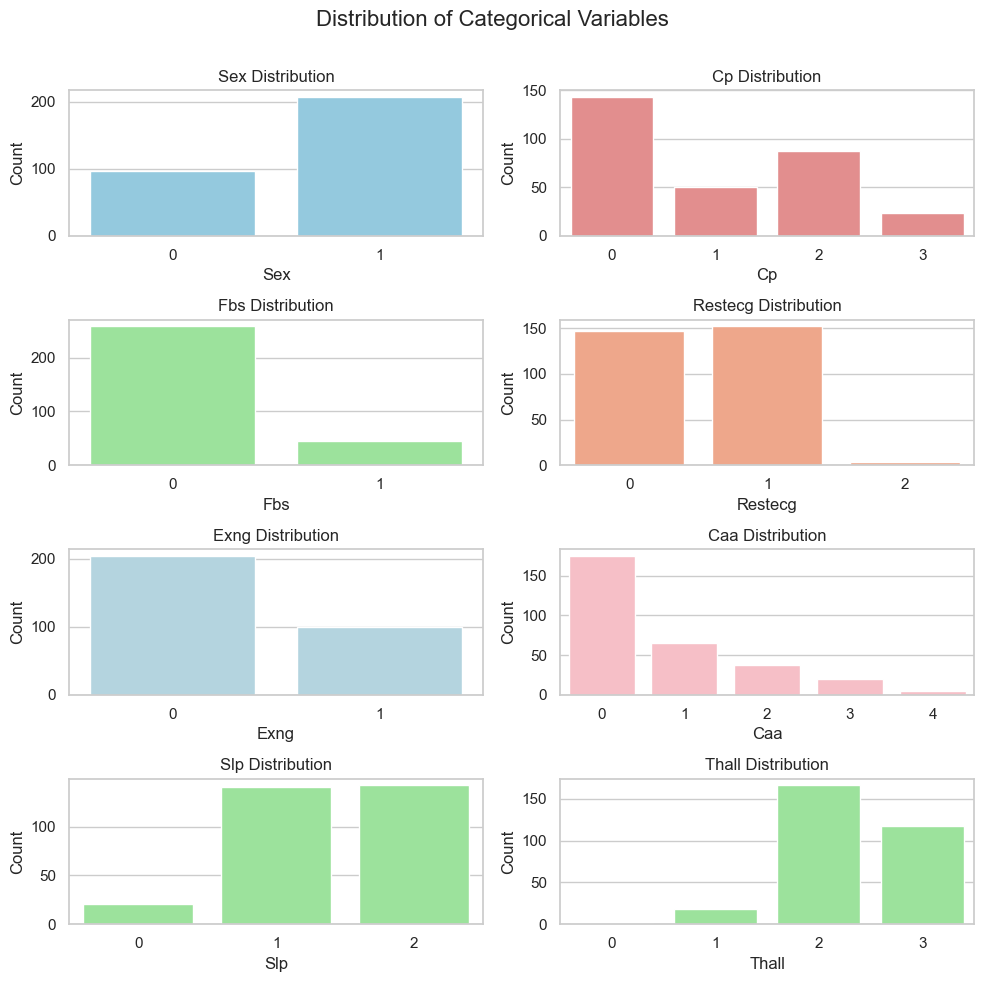

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize and their respective colors
categorical_vars = [
    ('sex', 'skyblue'),
    ('cp', 'lightcoral'),
    ('fbs', 'lightgreen'),
    ('restecg', 'lightsalmon'),
    ('exng', 'lightblue'),
    ('caa', 'lightpink'),
    ('slp', 'lightgreen'),
    ('thall', 'lightgreen')
]

# Create subplots for each categorical variable
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Loop through each categorical variable and plot its distribution with the specified color
for i, (var, color) in enumerate(categorical_vars):
    row = i // 2
    col = i % 2

    # Plot the countplot using Seaborn
    sns.countplot(data=data, x=var, ax=axs[row, col], palette=[color], hue=var, legend=False)

    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

data.describe()


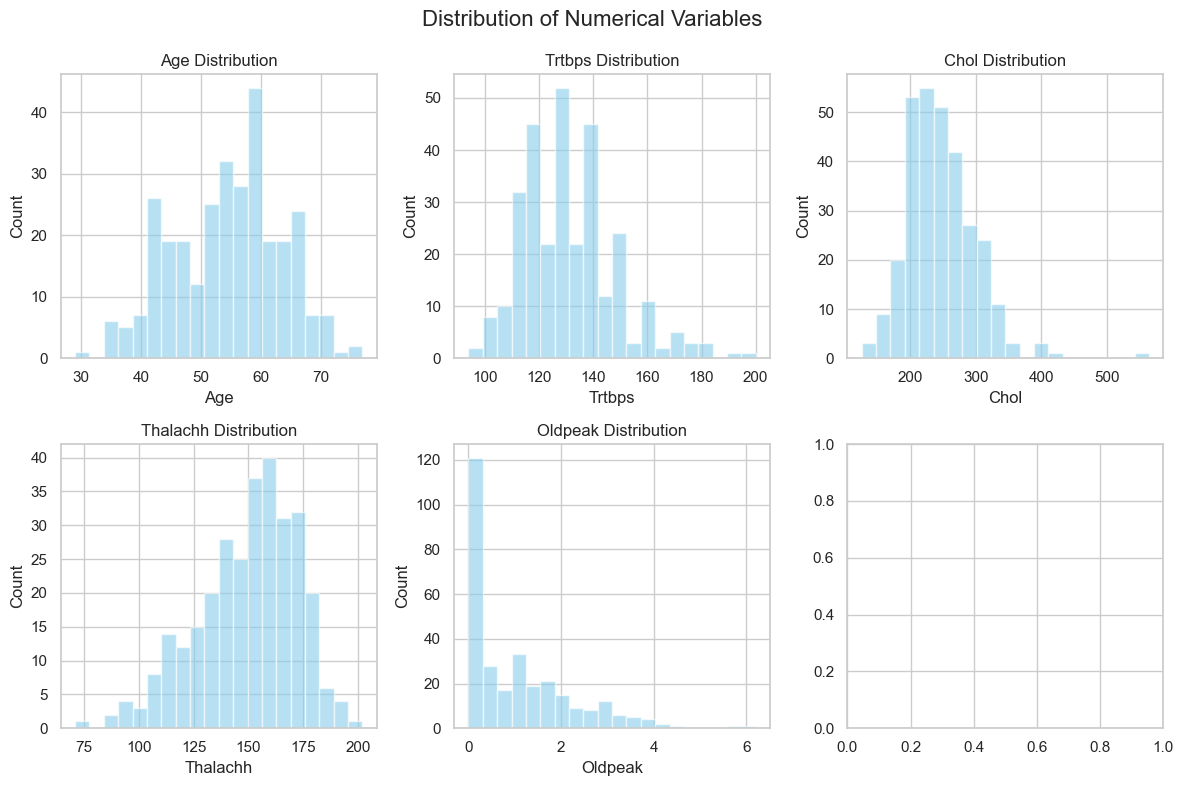

In [218]:
# List of numerical variables
numerical_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Create subplots for each numerical variable
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_vars):
    row = i // 3
    col = i % 3

    # Plot the distribution of the numerical variable
    axs[row, col].hist(data[var], bins=20, color='skyblue', alpha=0.6)
    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Try to scale data:

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing

# Define the features (X) and the target variable (y)
X = data.drop(columns=['output'])  # Features (all columns except 'output')
y = data['output']  # Target variable

# Select categorical and numerical columns
X_categorical = X[['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall']]
X_numerical = X.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall'])

# encode the Outlook and Wind features
encoder = preprocessing.OneHotEncoder()
X_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_categorical[['cp', 'restecg', 'caa', 'thall']]).toarray(), columns=encoder.get_feature_names_out(['cp', 'restecg', 'caa', 'thall']))

# drop old columns so that the encoded ones can be concatinated later
X_categorical = X_categorical.drop(columns=['cp', 'restecg', 'caa', 'thall'])

# Data Scaling for numerical values
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=X_numerical.columns)

# Concatenate scaled numerical and categorical and encoded categorical data
X_scaled = pd.concat([X_scaled_numerical_df, X_categorical], axis=1)
X_scaled = pd.concat([X_categorical_encoded, X_scaled], axis=1)

display(X_scaled.head())
display(X.head())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,caa_0,caa_1,caa_2,...,thall_3,age,trtbps,chol,thalachh,oldpeak,slp,sex,fbs,exng
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.952197,0.763956,-0.256334,0.015443,1.087338,-2.274579,1,1,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-1.915313,-0.092738,0.072199,1.633471,2.122573,-2.274579,1,0,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0.976352,0,0,0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.976352,1,0,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.290464,-0.663867,2.082050,0.583939,-0.379244,0.976352,0,0,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Visualize the distributation again:

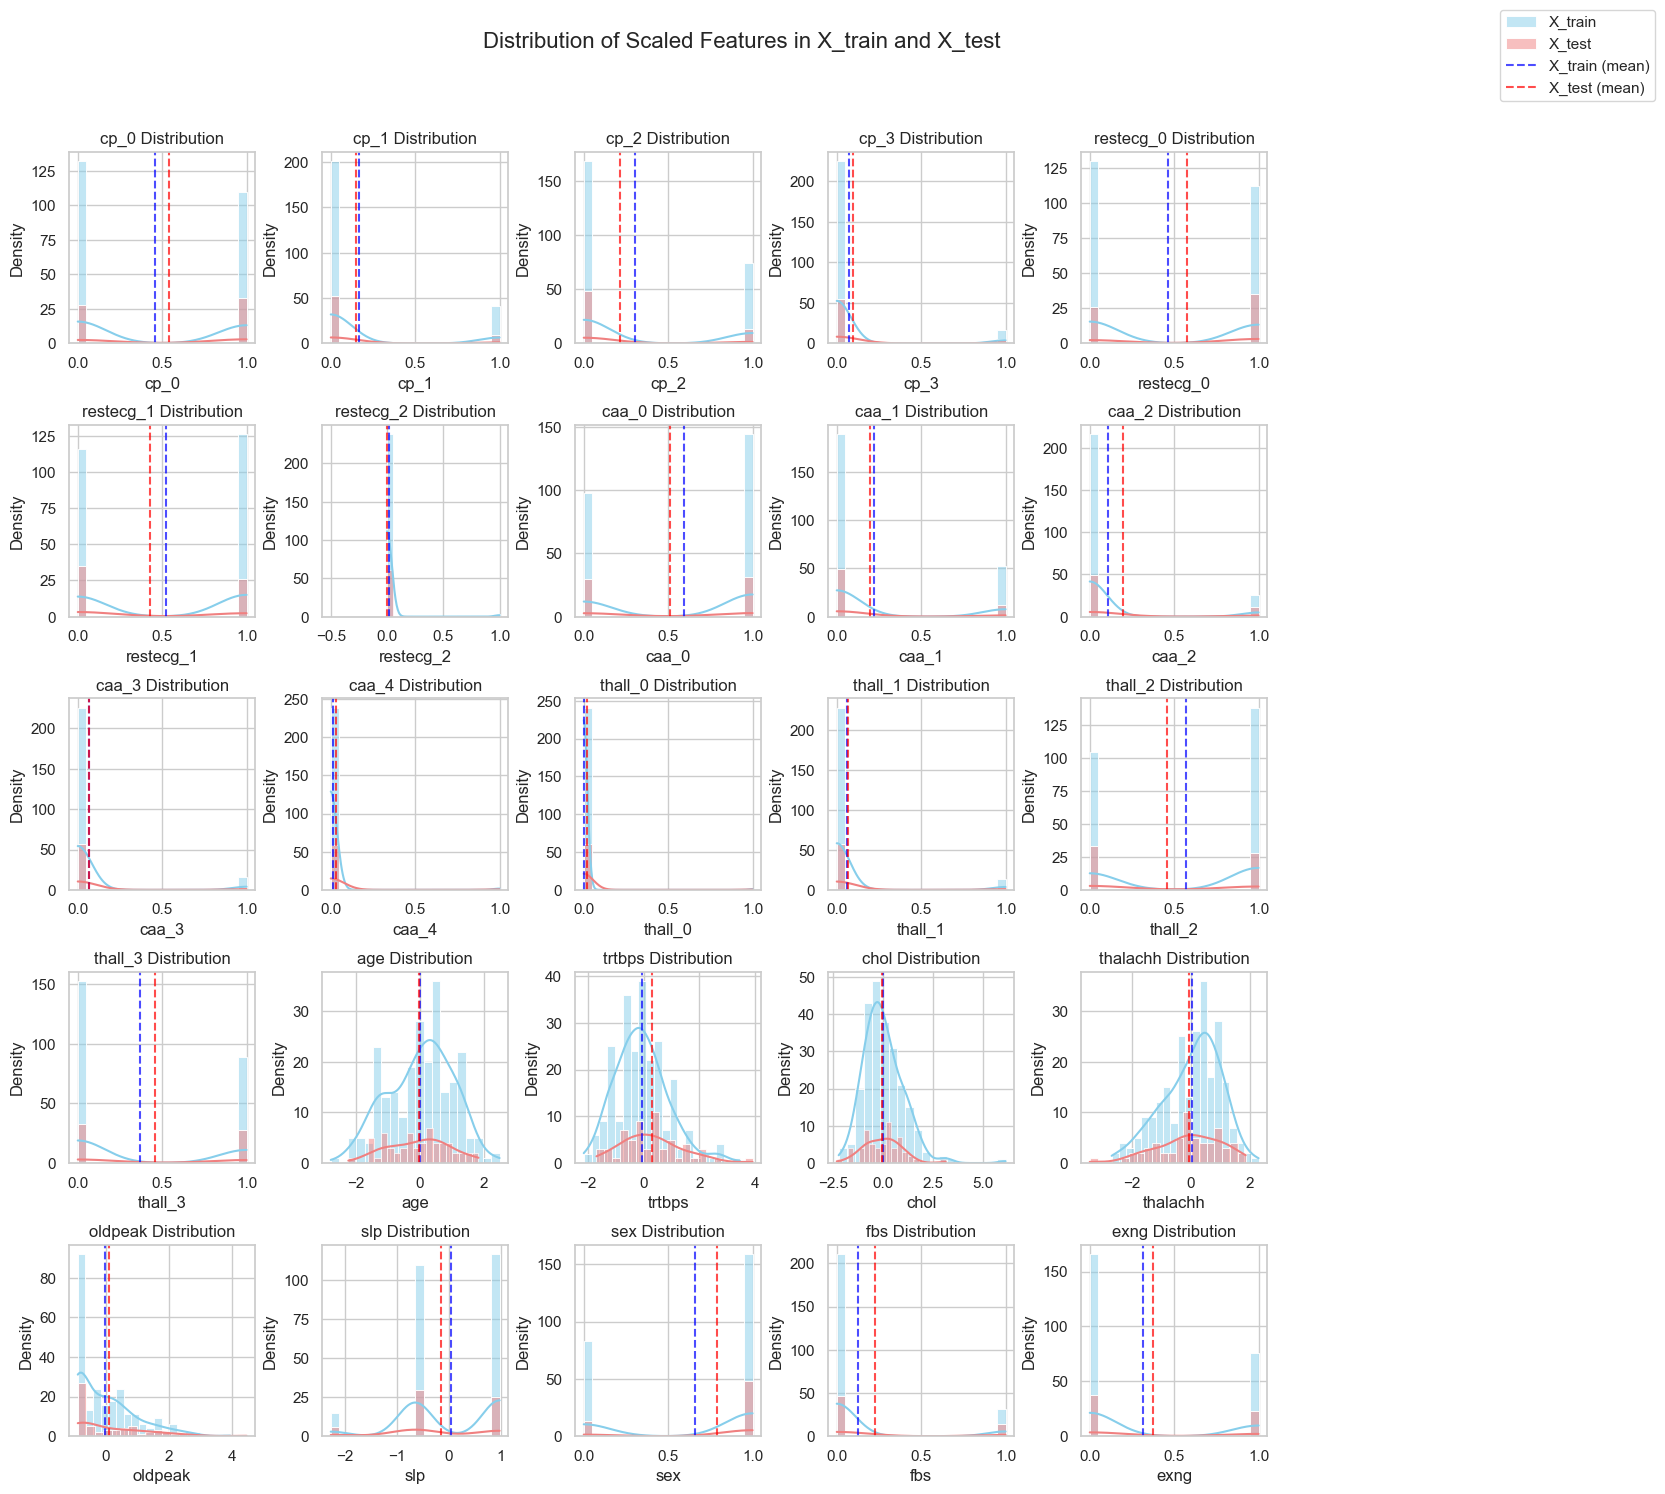

In [220]:
import seaborn as sns

# Extract numerical feature names
cols = X_train.columns

# Create subplots for each feature using Seaborn
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle('Distribution of Scaled Features in X_train and X_test', fontsize=16)

for i, feature in enumerate(cols):
    row = i // 5
    col = i % 5

    # Plot X_train feature distribution using Seaborn
    sns.histplot(X_train[feature], bins=20, color='skyblue', ax=axs[row, col], label='X_train', kde=True)

    # Plot X_test feature distribution using Seaborn
    sns.histplot(X_test[feature], bins=20, color='lightcoral', ax=axs[row, col], label='X_test', kde=True)

    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    
    # Calculate the means for train and test
    mean_train = X_train[feature].mean()
    mean_test = X_test[feature].mean()
    
    # Add vertical lines for the means
    axs[row, col].axvline(mean_train, color='blue', linestyle='--', alpha=0.7)
    axs[row, col].axvline(mean_test, color='red', linestyle='--', alpha=0.7)

# Create legend with custom handles and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='blue', linestyle='--', alpha=0.7), plt.Line2D([0], [0], color='red', linestyle='--', alpha=0.7)])
labels.extend(['X_train (mean)', 'X_test (mean)'])

# Add the legend to the figure
fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1,1))

# Remove the empty subplots
for i in range(len(cols), 5 * 5):
    fig.delaxes(axs[i // 5, i % 5])

plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()

## Visualize for test_size=0.3 instead of 0.2

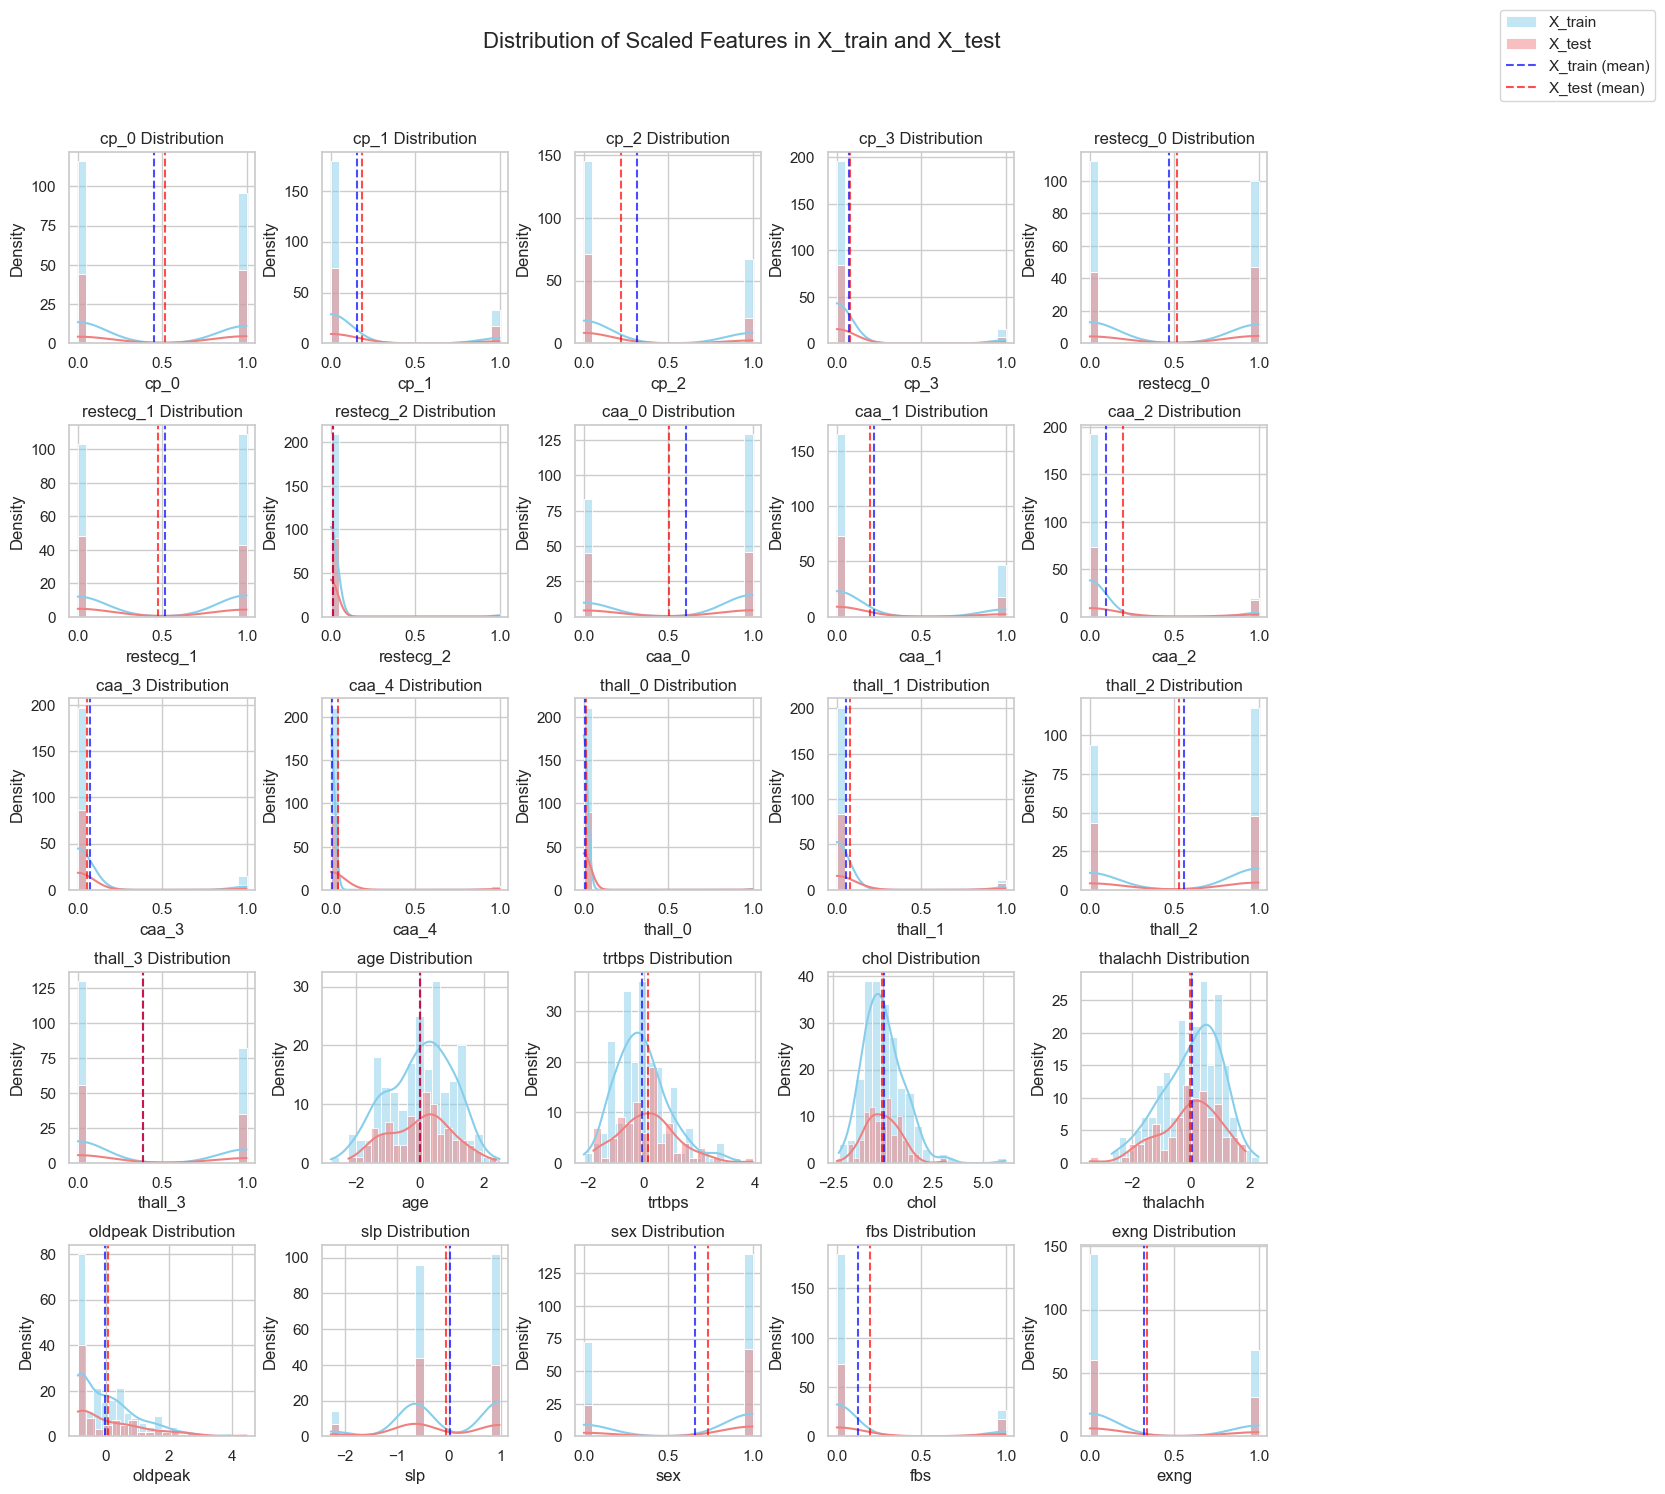

In [221]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Extract numerical feature names
cols = X_train.columns

# Create subplots for each feature using Seaborn
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle('Distribution of Scaled Features in X_train and X_test', fontsize=16)

for i, feature in enumerate(cols):
    row = i // 5
    col = i % 5

    # Plot X_train feature distribution using Seaborn
    sns.histplot(X_train[feature], bins=20, color='skyblue', ax=axs[row, col], label='X_train', kde=True)

    # Plot X_test feature distribution using Seaborn
    sns.histplot(X_test[feature], bins=20, color='lightcoral', ax=axs[row, col], label='X_test', kde=True)

    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    
    # Calculate the means for train and test
    mean_train = X_train[feature].mean()
    mean_test = X_test[feature].mean()
    
    # Add vertical lines for the means
    axs[row, col].axvline(mean_train, color='blue', linestyle='--', alpha=0.7)
    axs[row, col].axvline(mean_test, color='red', linestyle='--', alpha=0.7)

# Create legend with custom handles and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='blue', linestyle='--', alpha=0.7), plt.Line2D([0], [0], color='red', linestyle='--', alpha=0.7)])
labels.extend(['X_train (mean)', 'X_test (mean)'])

# Add the legend to the figure
fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1,1))

# Remove the empty subplots
for i in range(len(cols), 5 * 5):
    fig.delaxes(axs[i // 5, i % 5])

plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()

## Train a default Decision Tree

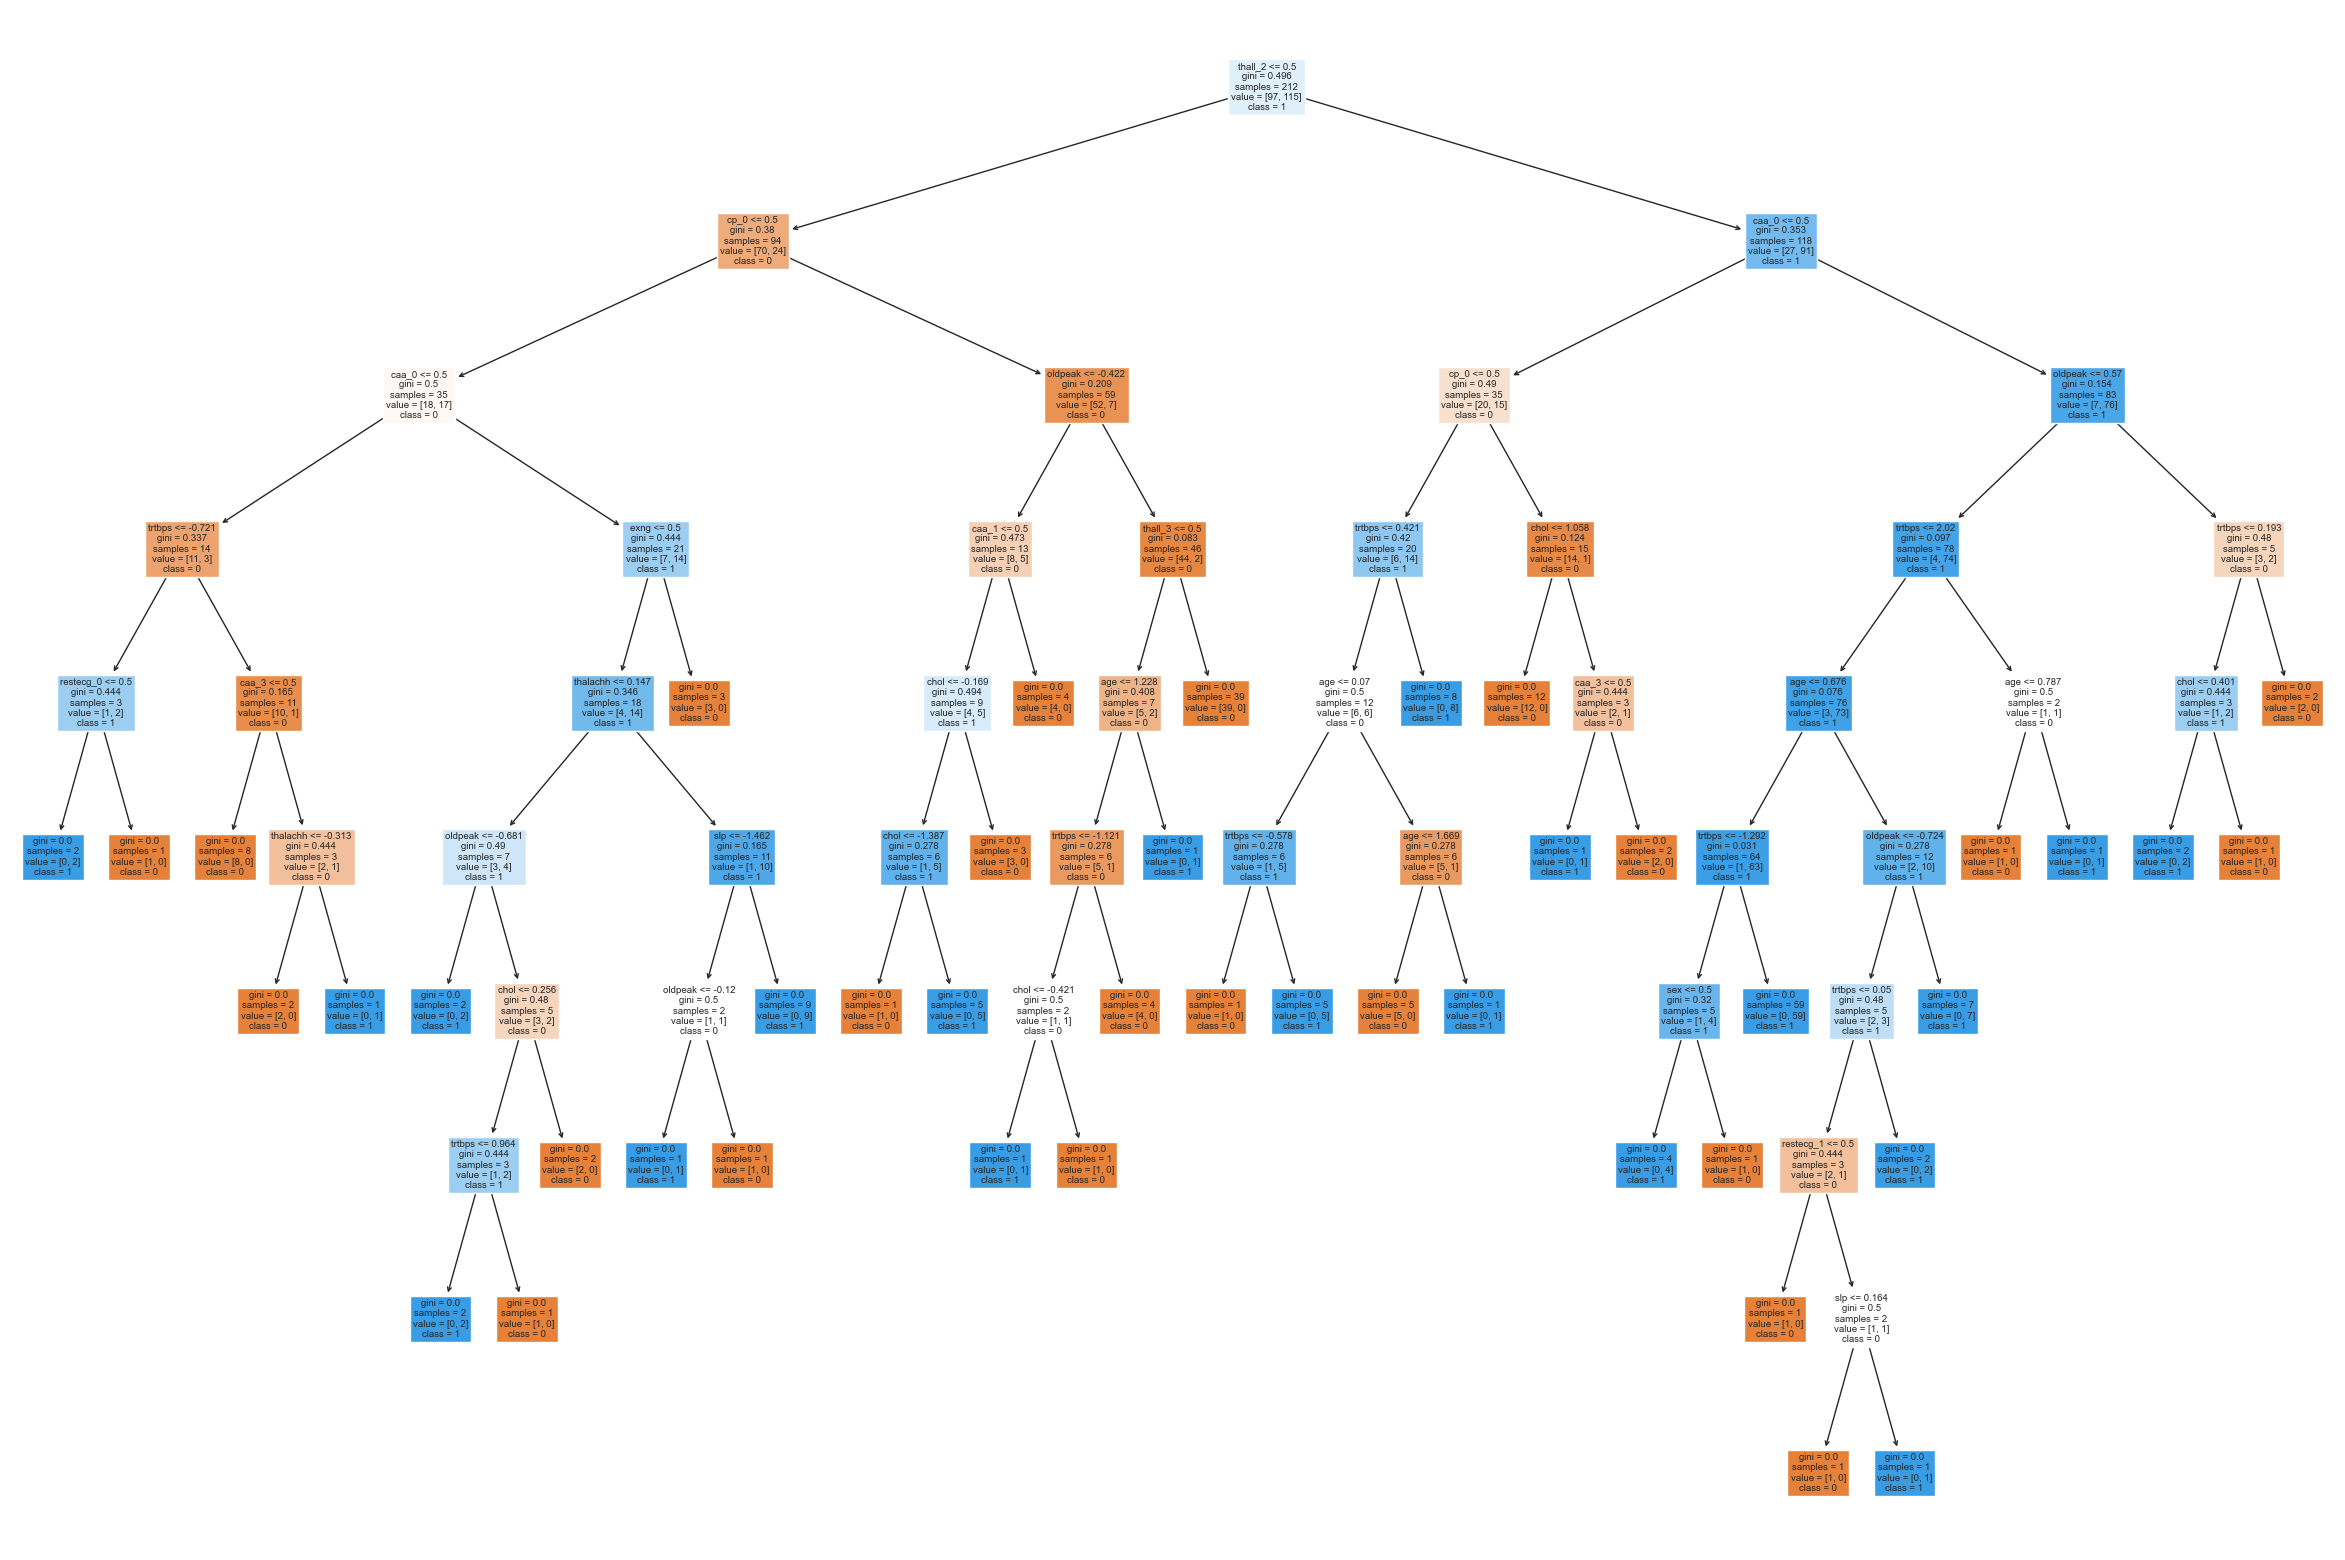

In [222]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Assuming your decision tree model is dt
plt.figure(figsize=(30,20))  # Set the figure size
tree.plot_tree(dt, 
               feature_names = X_train.columns,  # use your dataframe's column names here
               class_names=['0','1'],  # assuming your target variable is binary. Change as needed
               filled = True)
plt.show()

In [223]:
# Predicting on Test Data
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report)

Accuracy:  0.7692307692307693
Confusion Matrix: 
 [[33  8]
 [13 37]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



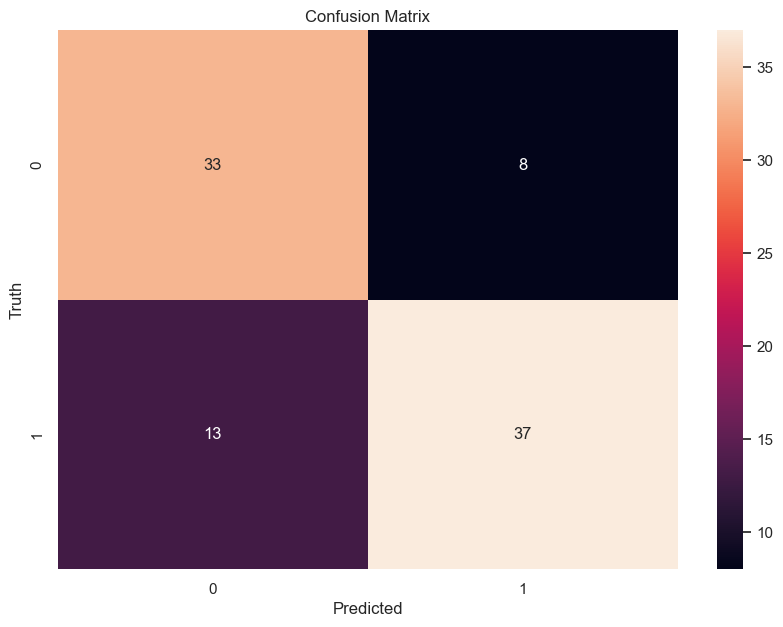

In [224]:
# Display confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## Try different values for max_depth

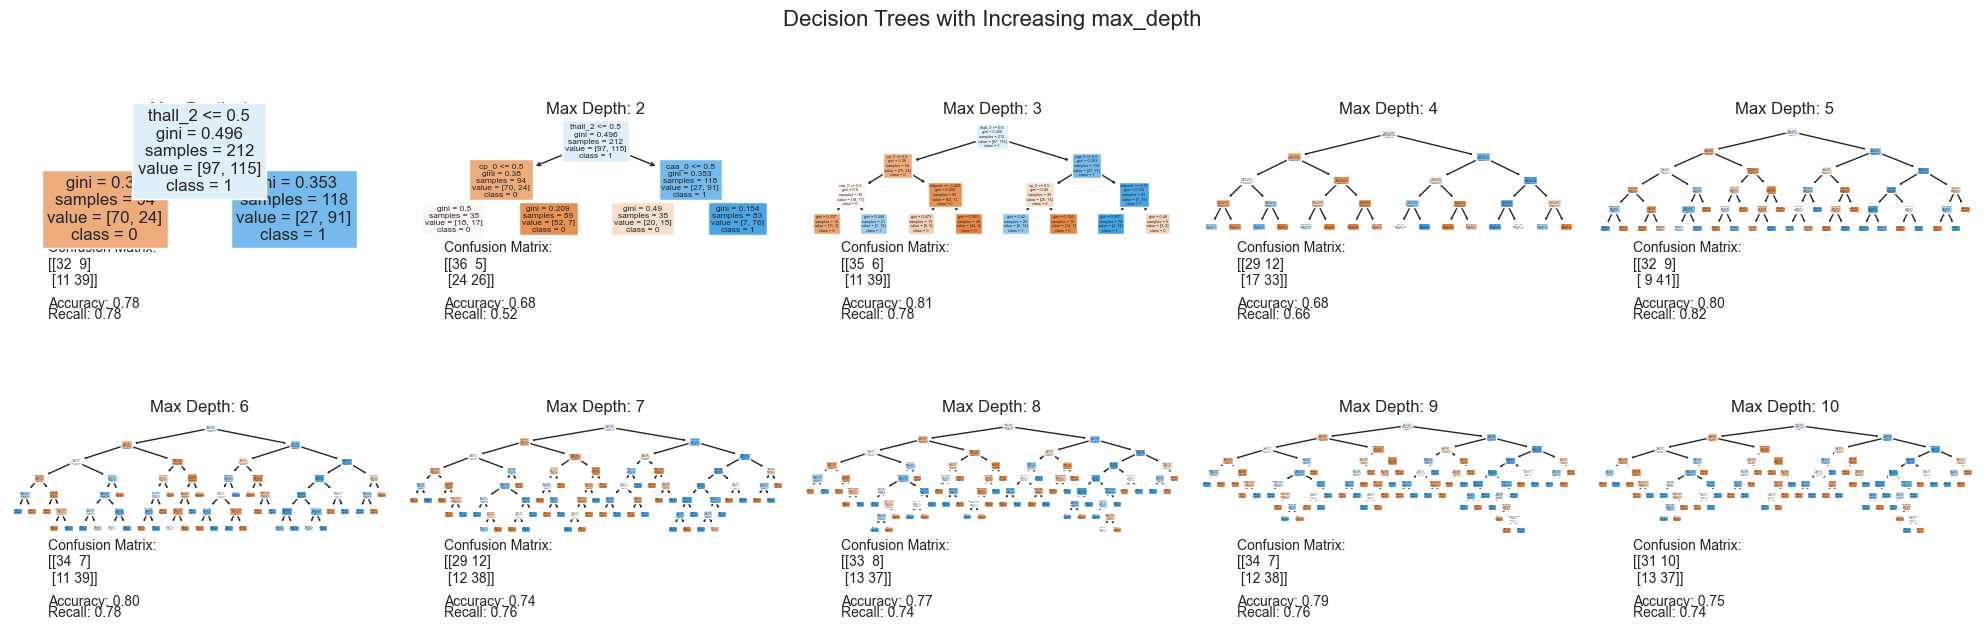

In [225]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Create an array to store the different max_depth values
max_depth_values = range(1, 11)

# Create subplots for trees with 4 rows
fig, axs = plt.subplots(4, 5, figsize=(20, 12))  # Increase the number of rows to 4
fig.suptitle('Decision Trees with Increasing max_depth', fontsize=16)

for i, max_depth in enumerate(max_depth_values):
    row = i // 5
    col = i % 5

    # Fit the Decision Tree with the current max_depth
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Plot the tree
    plot_tree(dt, feature_names=X_train.columns, class_names=['0', '1'], filled=True, ax=axs[row, col])

    # Calculate confusion matrix, accuracy, and recall
    y_pred = dt.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Display the confusion matrix, accuracy, and recall as text
    axs[row, col].set_title(f"Max Depth: {max_depth}", fontsize=12)
    axs[row, col].text(0.1, -0.4, f"Confusion Matrix:\n{cm}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.1, -0.6, f"Accuracy: {accuracy:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.1, -0.7, f"Recall: {recall:.2f}", transform=axs[row, col].transAxes, fontsize=10)

# Remove empty subplots
for i in range(len(max_depth_values), 20):
    fig.delaxes(axs[i // 5, i % 5])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Random test for kNN

k = 1 acc: 0.73
k = 2 acc: 0.71
k = 3 acc: 0.79
k = 4 acc: 0.79
k = 5 acc: 0.87
k = 6 acc: 0.84
k = 7 acc: 0.86
k = 8 acc: 0.84
k = 9 acc: 0.86
k = 10 acc: 0.81
Best k is 5 with accuracy 0.87


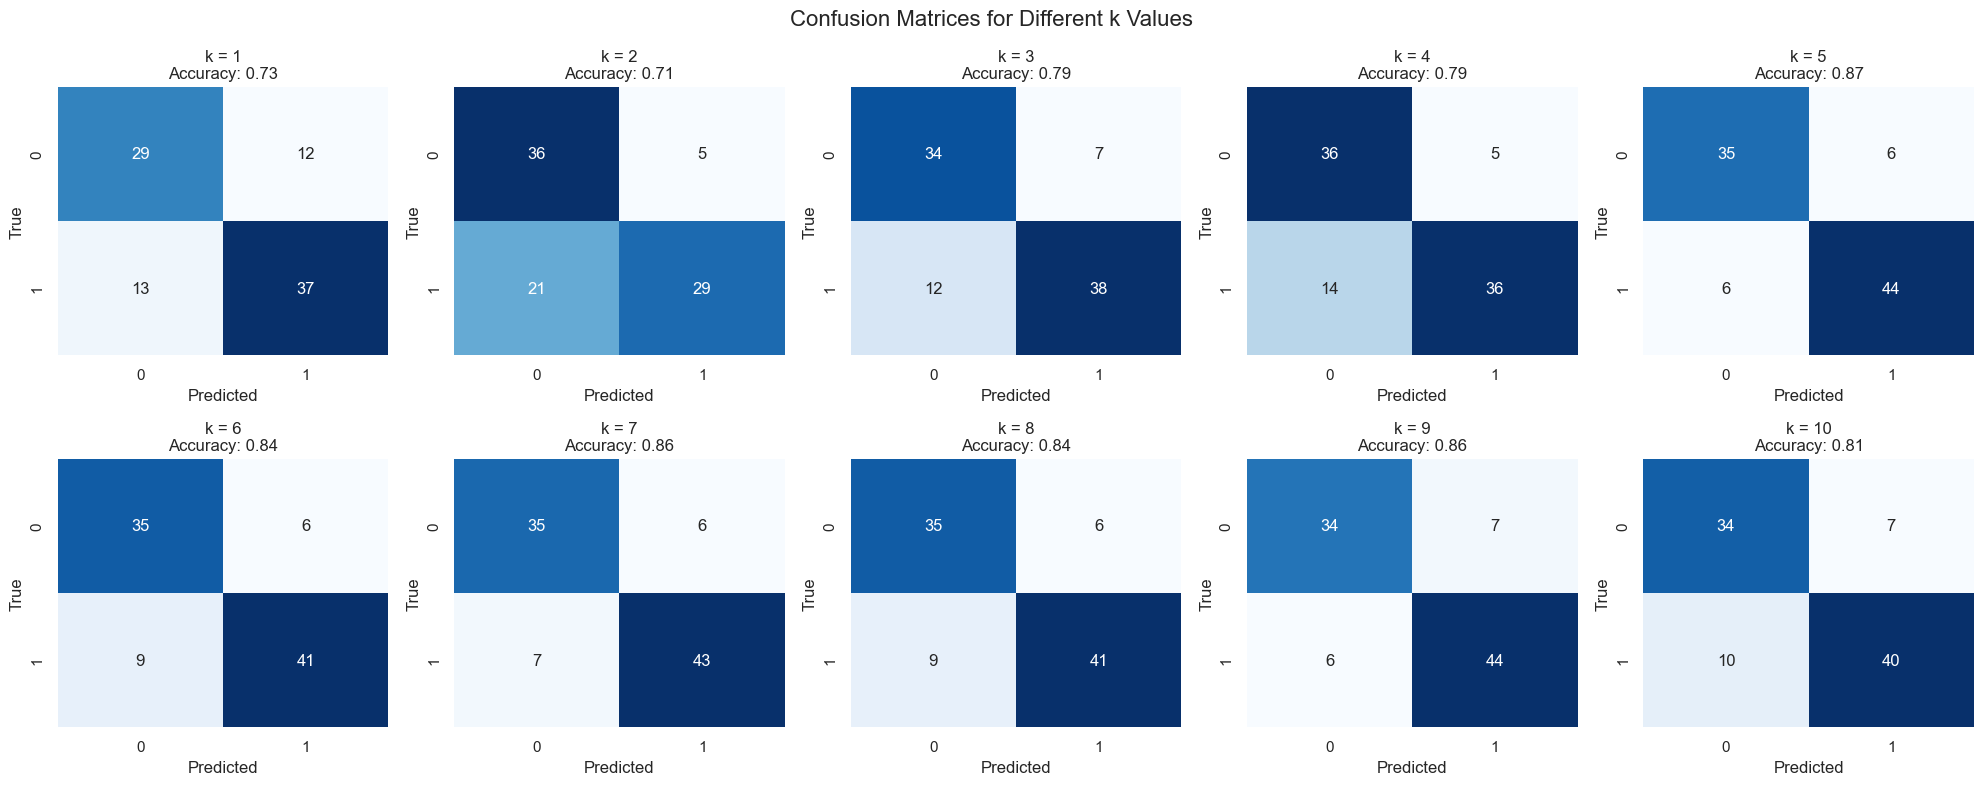

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, and y_test defined

accuracy_scores = []

for n_neighbors in range(1, 11):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(X_train, y_train)
    test_prediction = knn_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, test_prediction)
    accuracy_scores.append(accuracy)
    
    print("k = {} acc: {:.2f}".format(n_neighbors, accuracy))

# Find the best value of k
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best k is {} with accuracy {:.2f}".format(best_k, max(accuracy_scores)))

# Create subplots for confusion matrices and accuracy text
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Confusion Matrices for Different k Values', fontsize=16)

for i, n_neighbors in enumerate(range(1, 11)):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(X_train, y_train)
    test_prediction = knn_estimator.predict(X_test)
    
    # Calculate the confusion matrix for each k value
    cm = confusion_matrix(y_test, test_prediction)
    
    # Plot the confusion matrix
    ax = axes[i // 5, i % 5]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title("k = {}\nAccuracy: {:.2f}".format(n_neighbors, accuracy_scores[i]))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


Best k is 5 with accuracy 0.87


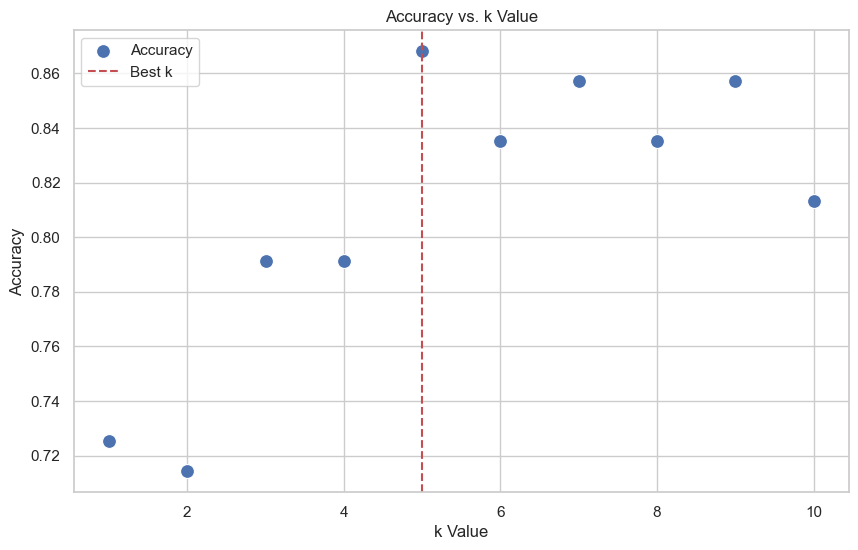

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, and y_test defined

accuracy_scores = []

for n_neighbors in range(1, 11):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(X_train, y_train)
    test_prediction = knn_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, test_prediction)
    accuracy_scores.append(accuracy)
    
# Find the best value of k
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best k is {} with accuracy {:.2f}".format(best_k, max(accuracy_scores)))

# Create a list of k values from 1 to 10
k_values = list(range(1, 11))

# Create a dictionary to hold k values and their corresponding accuracy scores
data = {'k': k_values, 'Accuracy': accuracy_scores}

# Create a Seaborn scatter plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='k', y='Accuracy', data=data, s=100, color='b', label='Accuracy')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.axvline(x=best_k, color='r', linestyle='--', label='Best k')
plt.legend()
plt.show()


## Try to make it better, more people will be found with heart attack

In [240]:
threshold = 0.3  # Adjust this threshold as needed

knn_estimator = KNeighborsClassifier(best_k)
knn_estimator.fit(X_train, y_train)

# Classify based on the adjusted threshold
adjusted_predictions = knn_estimator.predict_proba(X_test)[:, 1] >= threshold

# Calculate accuracy with the adjusted threshold
adjusted_accuracy = accuracy_score(y_test, adjusted_predictions)    

# Calculate the confusion matrix with the adjusted threshold
confusion = confusion_matrix(y_test, adjusted_predictions)

# Calculate recall with the adjusted threshold
recall = recall_score(y_test, adjusted_predictions)

# Print the adjusted accuracy, confusion matrix, and recall
print("Adjusted Accuracy with threshold {:.2f}: {:.2f}".format(threshold, adjusted_accuracy))

print("Confusion Matrix with threshold {:.2f}:".format(threshold))
print(confusion)

print("Recall with threshold {:.2f}: {:.2f}".format(threshold, recall))


Adjusted Accuracy with threshold 0.30: 0.85
Confusion Matrix with threshold 0.30:
[[30 11]
 [ 3 47]]
Recall with threshold 0.30: 0.94
